# 밑바닥부터 시작하는 딥러닝 예제 연습

밑바닥부터 시작하는 딥러닝 1권에 나온 예제를 연습한 노트입니다. 
동시에 아이펠학교에서 진행했던 프로젝트 1번을 복습했습니다.

깃허브 저장소: https://github.com/WegraLee/deep-learning-from-scratch

In [28]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.4.1


In [29]:
mnist= keras.datasets.mnist

(x_train,y_train),(x_test,y_test) = mnist.load_data()

print(len(x_train))
print(x_train.shape)
print(y_train.shape) #훈련레이블
print(x_test.shape)
print(y_test.shape) #시험 레이블 

60000
(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [30]:
img = x_train[0]
label = y_train[0]
print(label)

5


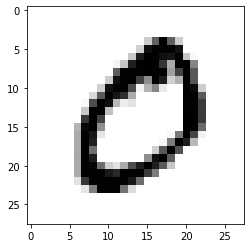

In [31]:
plt.imshow(x_train[1],cmap=plt.cm.binary)
plt.show()

In [32]:
print(y_train[1])

0


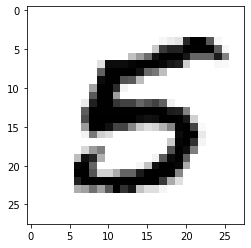

20001 번째 이미지의 숫자는 5 입니다.


In [33]:
index = 20000
plt.imshow(x_train[index],cmap=plt.cm.binary)
plt.show()
print((index+1),"번째 이미지의 숫자는",y_train[index],"입니다.")

# 데이터 전처리하기
손글씨 이미지의 픽셀 값은 0-255사이의 값을 가진다.

In [34]:
print('최솟값:',np.min(x_train),'최댓값:',np.max(x_train))

최솟값: 0 최댓값: 255


In [35]:
# 정규화 Norm

x_train_norm,x_test_norm = x_train/255.0,x_test/255.0
print('최솟값:',np.min(x_train_norm),'최댓값:',np.max(x_train_norm))

최솟값: 0.0 최댓값: 1.0


# 딥러닝 네트워크 설계하기 

텐서플로우 케라스로 네트워크를 설계할때 세가지 방법이 있다.
1. Sequential () :Sequential()을 model로 선언한 뒤에 model.add()라는 코드를 통해 층을 단계적으로 추가
2. subclassing
3.  Functional API

In [23]:
model=keras.models.Sequential()
model.add(keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(28,28,1)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(32, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(32, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax')) 

print('Model에 추가된 Layer 개수: ', len(model.layers))

Model에 추가된 Layer 개수:  7


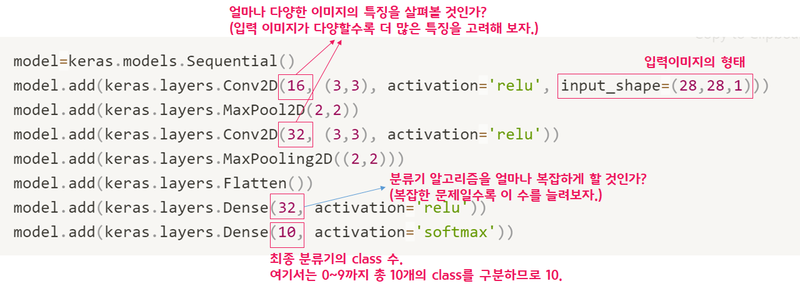

In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 16)        160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 800)               0         
_________________________________________________________________
dense (Dense)                (None, 32)                25632     
_________________________________________________________________
dense_1 (Dense)              (None, 10)                3

# 딥러닝 네트워크 학습시키기
네트워크의 입력은 (데이터 갯수, x 이미지 크기, y 이미지 크기, 채널수) 여야 한다. 

하지만 현재 이미지의 입력은 (데이터 갯수,  x 이미지 크기, y 이미지 크기) 형태로 채널수에 대한 정보가 없다. 그래서 reshape로 만들어줘야한다.

In [40]:
print("Before Reshape - x_train_norm shape: {}".format(x_train_norm.shape))
print("Before Reshape - x_test_norm shape: {}".format(x_test_norm.shape))

x_train_reshaped=x_train_norm.reshape( -1, 28, 28, 1)  # 데이터갯수에 -1을 쓰면 reshape시 자동계산됩니다.
x_test_reshaped=x_test_norm.reshape( -1, 28, 28, 1)

print("After Reshape - x_train_reshaped shape: {}".format(x_train_reshaped.shape))
print("After Reshape - x_test_reshaped shape: {}".format(x_test_reshaped.shape))

Before Reshape - x_train_norm shape: (60000, 28, 28)
Before Reshape - x_test_norm shape: (10000, 28, 28)
After Reshape - x_train_reshaped shape: (60000, 28, 28, 1)
After Reshape - x_test_reshaped shape: (10000, 28, 28, 1)


In [41]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

model.fit(x_train_reshaped, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 6s 1ms/step - loss: 0.4362 - accuracy: 0.8667
Epoch 2/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0669 - accuracy: 0.9797
Epoch 3/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0519 - accuracy: 0.9840
Epoch 4/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0367 - accuracy: 0.9887
Epoch 5/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0298 - accuracy: 0.9900
Epoch 6/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0254 - accuracy: 0.9922
Epoch 7/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0182 - accuracy: 0.9941
Epoch 8/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0153 - accuracy: 0.9956
Epoch 9/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0149 - accuracy: 0.9955
Epoch 10/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.013

# 성능 확인하기

In [43]:
test_loss,test_accuracy = model.evaluate(x_test_reshaped,y_test,verbose=2)
print("test_loss:{}".format(test_loss))
print("test_accuracy:{}".format(test_accuracy))

313/313 - 1s - loss: 0.0367 - accuracy: 0.9888
test_loss:0.03668122738599777
test_accuracy:0.9887999892234802


## 잘못된 추론 확인하기 
model.predict()를 사용하면 model이 입력값을 보고 실제로 추론한 확률분포를 출력할 수 있습니다. 우리가 만든 model이란 사실 10개의 숫자 중 어느 것일지에 대한 확률값을 출력하는 함수입니다.
이 함수의 출력값 즉 확률값이 가장 높은 숫자가 바로 model이 추론한 숫자가 되는 거죠.

In [46]:
predicted_result = model.predict(x_test_reshaped)  # model이 추론한 확률값.=기댓값?) 
predicted_labels = np.argmax(predicted_result, axis=1)

idx=0  #1번째 x_test를 살펴보자. 
print('model.predict() 결과 : ', predicted_result[idx])
print('model이 추론한 가장 가능성이 높은 결과 : ', predicted_labels[idx])
print('실제 데이터의 라벨 : ', y_test[idx])

model.predict() 결과 :  [2.5588039e-11 5.3321479e-12 2.9401492e-06 1.5624375e-09 8.3844509e-13
 3.4845889e-13 1.2095885e-18 9.9999702e-01 7.8878752e-09 6.4513435e-09]
model이 추론한 가장 가능성이 높은 결과 :  7
실제 데이터의 라벨 :  7


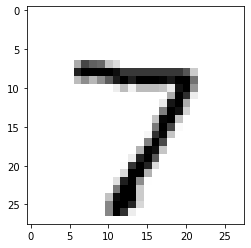

In [47]:
plt.imshow(x_test[idx],cmap=plt.cm.binary)
plt.show()

예측확률분포: [1.4497791e-01 3.0341133e-07 1.6142750e-04 5.1584512e-01 1.5073195e-03
 1.1389776e-04 1.1431879e-06 4.1922889e-04 1.7366896e-03 3.3523700e-01]
라벨: 9, 예측결과: 3


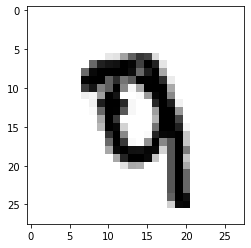

예측확률분포: [3.3011754e-06 1.5907111e-07 5.1213362e-09 3.0508757e-10 3.4529507e-01
 9.0131016e-07 1.3215769e-06 2.2723225e-06 3.0101046e-05 6.5466690e-01]
라벨: 4, 예측결과: 9


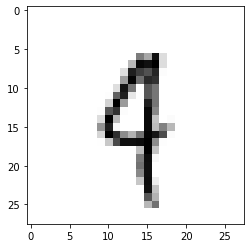

예측확률분포: [1.0988176e-07 6.7579271e-09 5.0865410e-08 2.0950126e-02 3.4685876e-08
 8.5433118e-02 2.2238388e-14 8.9355028e-01 8.9468200e-10 6.6374319e-05]
라벨: 5, 예측결과: 7


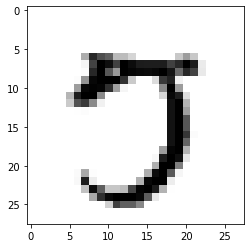

예측확률분포: [7.7505238e-06 4.6481343e-12 9.6474687e-06 1.1903976e-06 3.0997457e-05
 5.4554979e-04 3.4484877e-11 2.2017771e-02 1.7573999e-01 8.0164713e-01]
라벨: 8, 예측결과: 9


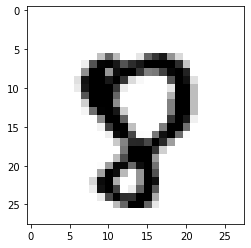

예측확률분포: [5.0596064e-08 4.3629691e-02 2.1382526e-03 1.1042632e-03 4.6121542e-07
 2.0256277e-08 1.6006101e-12 9.5307958e-01 8.8025473e-07 4.6817124e-05]
라벨: 2, 예측결과: 7


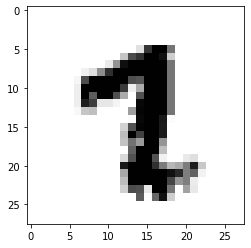

In [50]:
import random
wrong_predict_list=[]
for i, _ in enumerate(predicted_labels):
    # i번째 test_labels과 y_test이 다른 경우만 모아 봅시다. 
    if predicted_labels[i] != y_test[i]:
        wrong_predict_list.append(i)

# wrong_predict_list 에서 랜덤하게 5개만 뽑아봅시다.
samples = random.choices(population=wrong_predict_list, k=5)

for n in samples:
    print("예측확률분포: " + str(predicted_result[n]))
    print("라벨: " + str(y_test[n]) + ", 예측결과: " + str(predicted_labels[n]))
    plt.imshow(x_test[n], cmap=plt.cm.binary)
    plt.show()

# 성능 개선을 위해 하이퍼파라미터 바꿔보기

In [51]:
#바꿔 볼 수 있는 하이퍼파라미터들
n_channel_1=16
n_channel_2=32
n_dense=32
n_train_epoch=10

model=keras.models.Sequential()
model.add(keras.layers.Conv2D(n_channel_1, (3,3), activation='relu', input_shape=(28,28,1)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(n_channel_2, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(n_dense, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

model.summary()
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

# 모델 훈련
model.fit(x_train_reshaped, y_train, epochs=n_train_epoch)

# 모델 시험
test_loss, test_accuracy = model.evaluate(x_test_reshaped, y_test, verbose=2)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 26, 26, 16)        160       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 16)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 11, 11, 32)        4640      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 800)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 32)                25632     
_________________________________________________________________
dense_3 (Dense)              (None, 10)               